In [1]:
# Libs Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sys
import warnings
from pyod.models.knn import KNN
from sklearn.preprocessing import Normalizer
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

import tensorflow
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense


In [2]:
# Command to suppress warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Exploratory analysis

In [3]:
# Reading the file
df1 = pd.read_csv('diabetes.csv')

In [4]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Null Values Detection
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Missing Values Detection
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Duplicate Values Detection
df1.duplicated().sum()

0

<Axes: >

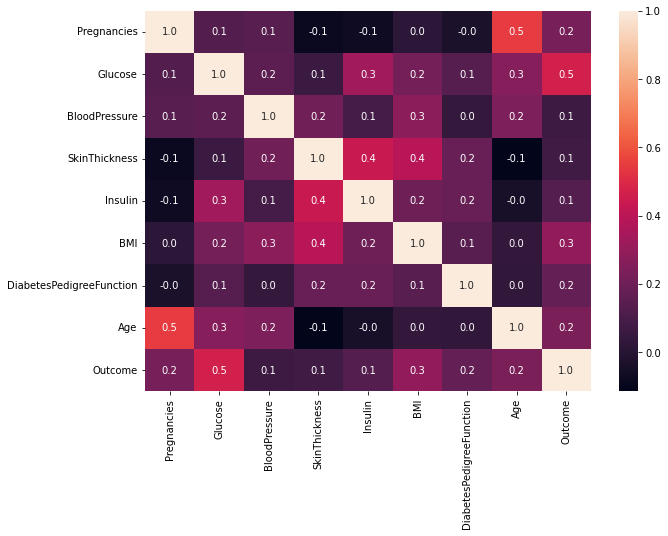

In [8]:
#correlation - Heat map

matriz_correlacao = df1.corr( )
plt.figure(figsize = (10, 7))
sns.heatmap(matriz_correlacao, annot = True, fmt='.1f')

In [9]:
# Separating the variable
df2 = df1.iloc[:, 0:8]

In [10]:
df2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


Pregnancies : int64
Glucose : int64
BloodPressure : int64
SkinThickness : int64
Insulin : int64
BMI : float64
DiabetesPedigreeFunction : float64
Age : int64


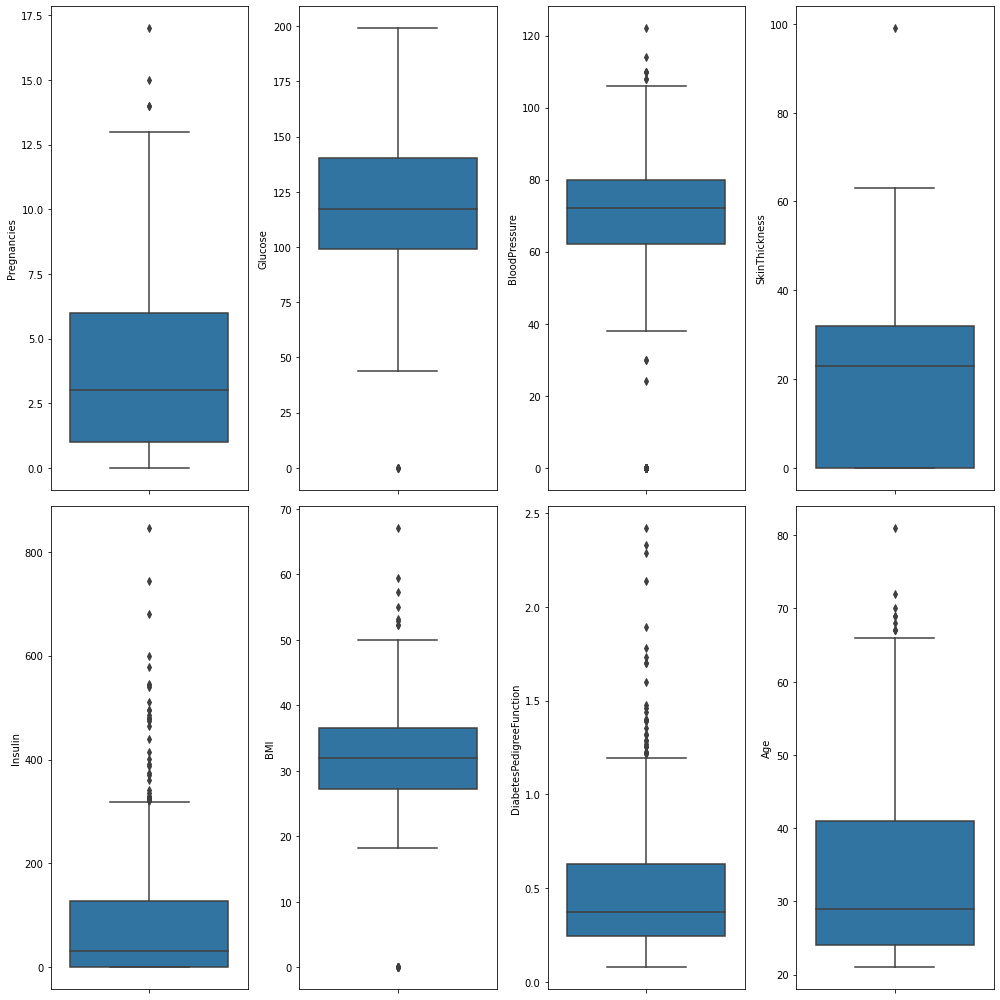

In [11]:
#Loading variables to plot

Variables = []
for i in df2.columns[0:8].tolist():
  #      if df2.dtypes[i] == 'int64' or df2.dtypes[i] == 'float64':            
            print(i, ':' , df2.dtypes[i]) 
            Variables.append(i)
  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in Variables:
    sns.boxplot(data = df2, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

In [12]:
# building filter - I used df1 because we need to exclude the lines including the target variable.

filter_Pregnacies = df1['Pregnancies'] < 13
filter_glucose = df1['Glucose'] > 0
filter_BP = df1['BloodPressure'] > 0
filter_BMI = df1['BMI'] > 0
filter_SkinThickness = df1['SkinThickness'] < 99

In [13]:
# Aply filter
df3 = df1[filter_Pregnacies]
df3 = df3[filter_glucose]
df3 = df3[filter_BP]
df3 = df3[filter_BMI]
df3 = df3[filter_SkinThickness]

In [14]:
df3.shape

(710, 9)

In [15]:
df3['SkinThickness'].sort_values(ascending=False)

445    63
57     60
120    56
211    54
275    52
       ..
559     0
560     0
264     0
564     0
164     0
Name: SkinThickness, Length: 710, dtype: int64

Next Steps:

let's put the predictor variables on the same scale. To do this, we will separate it again into predictor variables and target variables. After placing the predictor variables on the same scale, we will analyze the need to balance the target variable.


Pregnancies : int64
Glucose : int64
BloodPressure : int64
SkinThickness : int64
Insulin : int64
BMI : float64
DiabetesPedigreeFunction : float64
Age : int64


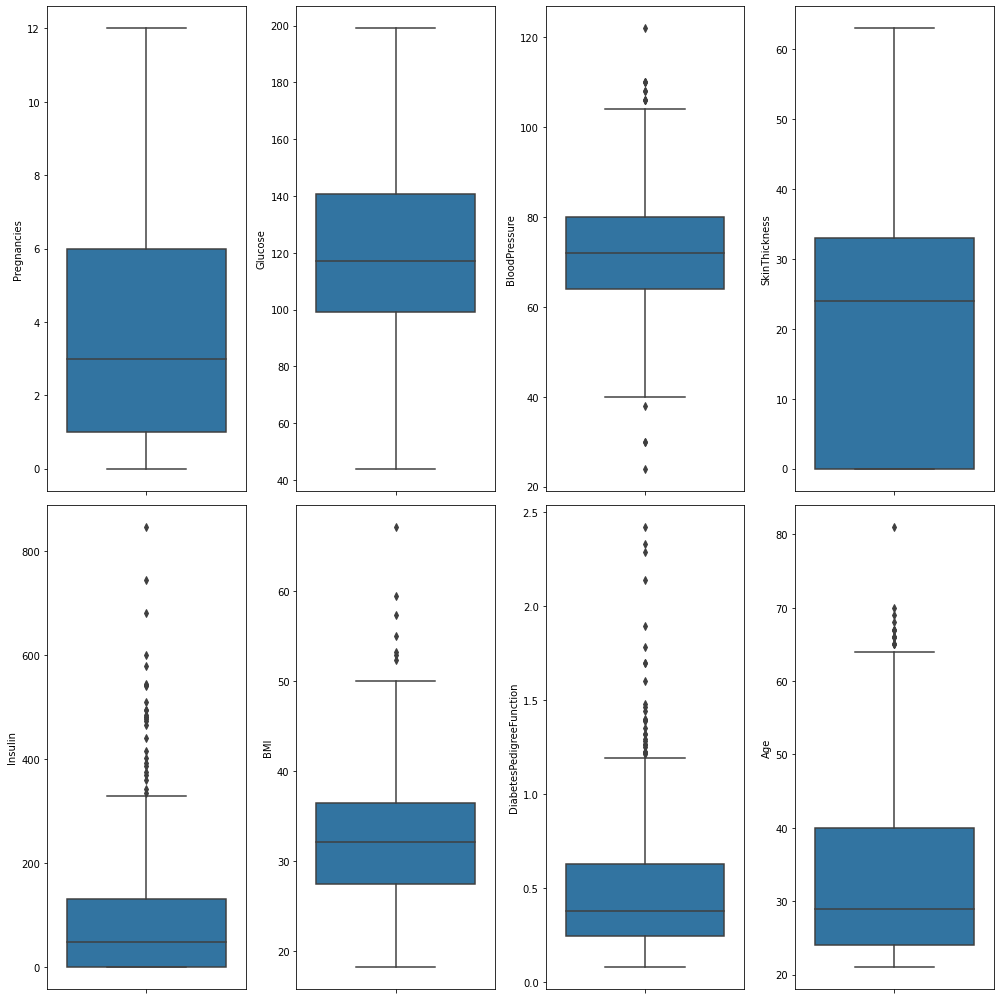

In [16]:
#Loading variables to plot

Variables = []
for i in df3.columns[0:8].tolist():
  #      if df2.dtypes[i] == 'int64' or df2.dtypes[i] == 'float64':            
            print(i, ':' , df3.dtypes[i]) 
            Variables.append(i)
  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in Variables:
    sns.boxplot(data = df3, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 


In [17]:
# Separating the variable
df3_predictor = df3.iloc[:, 0:8]

In [18]:
df3_predictor.shape

(710, 8)

In [19]:
df3_predictor.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


Normalized (put in the same scale)

In [20]:
df3_normalized = df3_predictor

In [21]:
df3_normalized = Normalizer().fit_transform(df3_normalized.values)

In [22]:
df3_normalized = pd.DataFrame(df3_normalized)

In [23]:
df3_normalized.head()

,0,1,2,3,4,5,6,7
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [24]:
df3_normalized.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [25]:
df3_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


Balanced target variable

In [26]:
#Now We goin to verify if the target variable is balanced
df3.groupby(['Outcome']).size()

Outcome
0    470
1    240
dtype: int64

<Axes: title={'center': 'Diabetes Diagnostic'}>

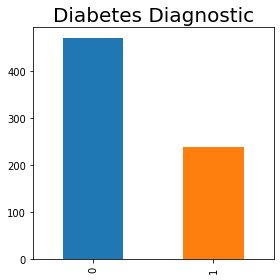

In [27]:
# Building a graphic to show the diference between diagnostics
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.autolayout'] = True
df3.Outcome.value_counts().plot(kind='bar', title="Diabetes Diagnostic", color = ['#1F77B4','#FF7F0E'])

In [28]:
target = df3['Outcome']

In [29]:
# It's necssary Smote the target variable

# creates the smote balancer
balanceador = SMOTE(random_state=100)

# Apply balancer
predictor_res, target_res = balanceador.fit_resample(df3_normalized, target)


<Axes: title={'center': 'Diabetes Diagnostic'}>

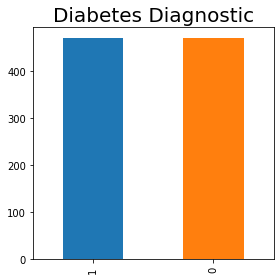

In [30]:
# Building a graphic to show the diference between diagnostics
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.autolayout'] = True
target_res.value_counts().plot(kind='bar', title="Diabetes Diagnostic", color = ['#1F77B4','#FF7F0E'])

In [31]:
df3_normalized.shape

(710, 8)

In [32]:
predictor_res.shape

(940, 8)

In [33]:
target.shape

(710,)

In [34]:
target_res.shape

(940,)

Separate datas in train and test

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor_res, target_res, test_size = 0.3, random_state = 42)

Creating the classifier with Random Forest and testing

In [36]:
# Creating the classifier with Random Forest
clf = RandomForestClassifier(n_estimators  = 300,
                            max_features='log2',
                            )

# Model construction
clf = clf.fit(X_train, Y_train)

In [37]:
# Checking model accuracy with test data
scores = clf.score(X_test,Y_test)

In [47]:
print('Accuracy score:', (scores).round(4)*100)

Accuracy score: 75.18


In [ ]:
# ---------------------------------------------------------------------------------------------#

Comparing Machine Learning and Deep Learning - Neural Networks

In [48]:
X_train.shape[1]

8

In [49]:
X_train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
296,0.014559,0.469543,0.218392,0.043678,0.840809,0.100096,0.001918,0.112836
417,0.000000,0.370746,0.277041,0.130372,0.855568,0.162558,0.001552,0.101853


Creating the neural network architecture

In [50]:
model_nn = Sequential()
model_nn.add(Dense(units=128, activation='relu', input_dim = X_train.shape[1]))
model_nn.add(Dense(units=64, activation='relu')),
model_nn.add(Dense(units=1, activation='linear'))

# training the neural network:  
model_nn.compile(loss = 'mse', optimizer = 'adam' , metrics=['mae', 'accuracy'])

results_nn = model_nn.fit(X_train, Y_train,
                       epochs= 110,
                       batch_size= 32,
         
                         validation_data= (X_test, Y_test)
                      )

Epoch 1/110
21/21 [==============================] - 1s 12ms/step - loss: 0.3128 - mae: 0.5013 - accuracy: 0.4985 - val_loss: 0.2624 - val_mae: 0.4977 - val_accuracy: 0.4858
Epoch 2/110
21/21 [==============================] - 0s 3ms/step - loss: 0.2422 - mae: 0.4863 - accuracy: 0.5745 - val_loss: 0.2393 - val_mae: 0.4832 - val_accuracy: 0.6028
Epoch 3/110
21/21 [==============================] - 0s 3ms/step - loss: 0.2375 - mae: 0.4811 - accuracy: 0.6049 - val_loss: 0.2327 - val_mae: 0.4766 - val_accuracy: 0.6631
Epoch 4/110
21/21 [==============================] - 0s 4ms/step - loss: 0.2317 - mae: 0.4726 - accuracy: 0.6368 - val_loss: 0.2297 - val_mae: 0.4703 - val_accuracy: 0.6348
Epoch 5/110
21/21 [==============================] - 0s 3ms/step - loss: 0.2256 - mae: 0.4650 - accuracy: 0.6489 - val_loss: 0.2223 - val_mae: 0.4620 - val_accuracy: 0.6667
Epoch 6/110
21/21 [==============================] - 0s 3ms/step - loss: 0.2235 - mae: 0.4586 - accuracy: 0.6398 - val_loss: 0.2178 - 

21/21 [==============================] - 0s 4ms/step - loss: 0.2030 - mae: 0.4042 - accuracy: 0.6976 - val_loss: 0.1966 - val_mae: 0.4054 - val_accuracy: 0.7305
Epoch 49/110
21/21 [==============================] - 0s 3ms/step - loss: 0.2006 - mae: 0.4025 - accuracy: 0.7021 - val_loss: 0.1955 - val_mae: 0.4057 - val_accuracy: 0.7234
Epoch 50/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1979 - mae: 0.4020 - accuracy: 0.6960 - val_loss: 0.2019 - val_mae: 0.4070 - val_accuracy: 0.6773
Epoch 51/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1977 - mae: 0.3963 - accuracy: 0.6960 - val_loss: 0.1936 - val_mae: 0.4019 - val_accuracy: 0.7305
Epoch 52/110
21/21 [==============================] - 0s 4ms/step - loss: 0.2013 - mae: 0.3976 - accuracy: 0.6991 - val_loss: 0.1942 - val_mae: 0.4045 - val_accuracy: 0.7163
Epoch 53/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1984 - mae: 0.4020 - accuracy: 0.7036 - val_loss: 0.1996 - val_mae:

21/21 [==============================] - 0s 3ms/step - loss: 0.1817 - mae: 0.3695 - accuracy: 0.7416 - val_loss: 0.1877 - val_mae: 0.3786 - val_accuracy: 0.7128
Epoch 96/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1813 - mae: 0.3753 - accuracy: 0.7371 - val_loss: 0.1851 - val_mae: 0.3817 - val_accuracy: 0.7411
Epoch 97/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1861 - mae: 0.3756 - accuracy: 0.7264 - val_loss: 0.1851 - val_mae: 0.3787 - val_accuracy: 0.7376
Epoch 98/110
21/21 [==============================] - 0s 3ms/step - loss: 0.1808 - mae: 0.3728 - accuracy: 0.7356 - val_loss: 0.1845 - val_mae: 0.3795 - val_accuracy: 0.7376
Epoch 99/110
21/21 [==============================] - 0s 4ms/step - loss: 0.1828 - mae: 0.3772 - accuracy: 0.7280 - val_loss: 0.1823 - val_mae: 0.3740 - val_accuracy: 0.7482
Epoch 100/110
21/21 [==============================] - 0s 4ms/step - loss: 0.1806 - mae: 0.3672 - accuracy: 0.7401 - val_loss: 0.1934 - val_mae

In [72]:
loss_test,mae_test, accuracy_test = model_nn.evaluate(X_test, Y_test)

print('Loss test:', loss_test)
print('Accuracy score:', accuracy_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1831 - mae: 0.3744 - accuracy: 0.7411
Loss test: 0.18311181664466858
Accuracy score: 0.741134762763977


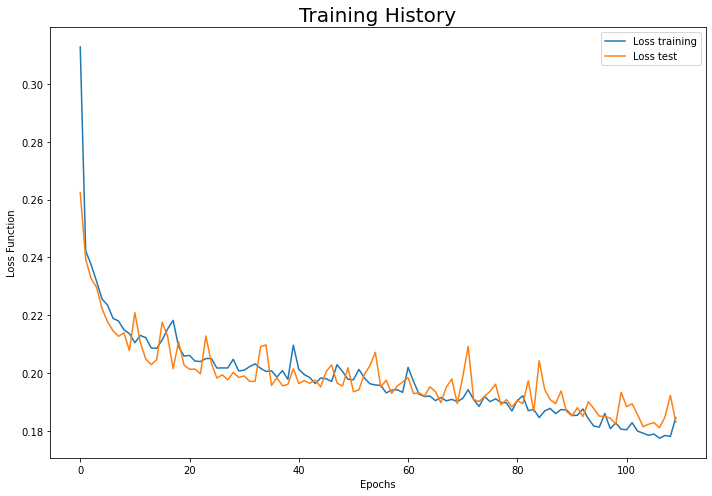

In [57]:
# plotar training history graph
plt.figure(figsize = (10, 7))
plt.plot(results_nn.history['loss'])
plt.plot(results_nn.history['val_loss'])
plt.title("Training History")
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.legend(['Loss training', 'Loss test'])
plt.show()

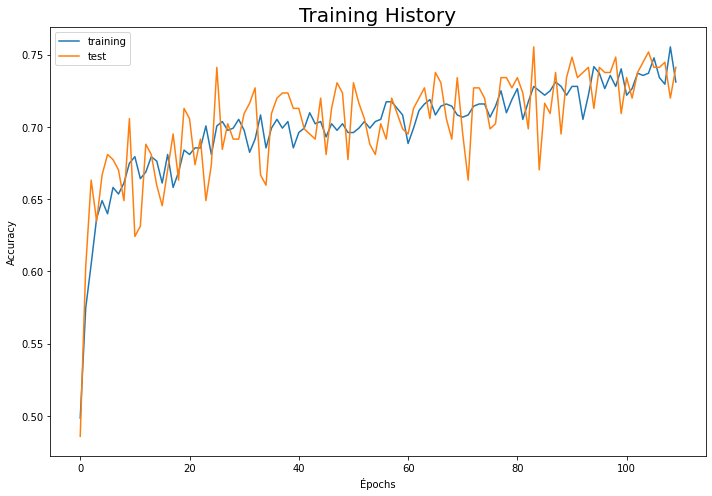

In [58]:
# plotar training history graph
plt.figure(figsize = (10, 7))
plt.plot(results_nn.history['accuracy'])
plt.plot(results_nn.history['val_accuracy'])
plt.title("Training History")
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'test'])
plt.show()

 Machine Learning(Randon Forest) vs Deep Learning (Neural Networking)

In [96]:
print('Machine Learning (Random Forest) =', (scores).round(4)*100)

print("Deep Learning (Neural NetWorking) = %.2f%%" %((accuracy_test)*100))                            

Machine Learning (Random Forest) = 75.18
Deep Learning (Neural NetWorking) = 74.11%
